In [1]:
# Importing Data maniupulation libraries
%pip install statsmodels
import numpy as np
import pandas as pd

# Importing Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns 

# Importing fliter warnings
import warnings
warnings.filterwarnings('ignore')

# Importing OrderedDist (If the dataset contains both categorical and numerical features)
from collections import OrderedDict

# Importi Logginsg library
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(message)s - %(levelname)s',
                    filename = 'cement.log',
                    filemode = 'w',
                    force = True)

# Importing Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost
from xgboost import XGBRegressor
from sklearn.cluster import KMeans

d:\Cement_Strength_model\.venv\Scripts\python.exe: No module named pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Updating the log file 
logging.info('All dependencies libraries are imported successfully')

In [3]:
# Importing the dataset
df = pd.read_csv(r'D:\Cement_Strength_model\data\raw\Concrete_Compressive_Strength.csv')
df.sample(frac = 1)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement_ratio,total_binder,aggregate_to_cement,cement_water_interaction,age_strength_proxy
1021,203.5,305.3,0.0,203.5,0.0,963.4,630.0,3,9.56,0.999995,508.8,7.829937,41412.25,1.732051
593,424.0,22.0,132.0,168.0,8.9,822.0,750.0,56,74.36,0.396225,578.0,3.707538,71232.00,7.483315
556,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,90,47.22,0.399999,500.0,3.475993,100000.00,9.486833
15,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,100,49.97,0.849856,336.4,8.659922,38847.46,10.000000
658,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,28,55.94,0.359999,525.0,3.310470,99225.00,5.291503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,100,56.74,0.588154,414.7,5.976763,51950.56,10.000000
681,160.2,188.0,146.4,203.2,11.3,828.7,709.7,28,35.31,1.268407,494.6,9.602936,32552.64,5.291503
442,359.0,19.0,141.0,154.0,10.9,942.0,801.0,7,35.75,0.428968,519.0,4.855140,55286.00,2.645751
416,333.0,0.0,0.0,192.0,0.0,931.2,842.6,90,41.68,0.576575,333.0,5.326711,63936.00,9.486833


In [4]:
logging.info('Dataset Imported Successfully')

In [5]:
# Checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cement                    1030 non-null   float64
 1   slag                      1030 non-null   float64
 2   ash                       1030 non-null   float64
 3   water                     1030 non-null   float64
 4   superplastic              1030 non-null   float64
 5   coarseagg                 1030 non-null   float64
 6   fineagg                   1030 non-null   float64
 7   age                       1030 non-null   int64  
 8   strength                  1030 non-null   float64
 9   water_cement_ratio        1030 non-null   float64
 10  total_binder              1030 non-null   float64
 11  aggregate_to_cement       1030 non-null   float64
 12  cement_water_interaction  1030 non-null   float64
 13  age_strength_proxy        1030 non-null   float64
dtypes: float

In [6]:
logging.info('Dataset Information Checked')

In [7]:
# Is there any null values in the dataset
print('Missing values in the dataset:')
df.isnull().sum()

Missing values in the dataset:


cement                      0
slag                        0
ash                         0
water                       0
superplastic                0
coarseagg                   0
fineagg                     0
age                         0
strength                    0
water_cement_ratio          0
total_binder                0
aggregate_to_cement         0
cement_water_interaction    0
age_strength_proxy          0
dtype: int64

In [8]:
logging.info('Checked the Null Values')

In [9]:
stats = []

# Descriptive statistics
for col in df.columns:
    if df[col].dtype != 'object':
        numerical_stats = OrderedDict({
            'Feature': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Mean': df[col].mean(),
            'Mode': df[col].mode()[0] if not df[col].mode().empty else None,
            '25%': df[col].quantile(0.25),
            '75%': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        })
        stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)

# Outlier Identification :
outlier_label = []
for col in report['Feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
report

,Feature,Minimum,Maximum,Mean,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis,Outlier Comment
0,cement,102.000000,540.000000,281.167864,362.600000,192.375000,350.000000,157.625000,104.506364,0.509481,-0.520652,No Outliers
1,slag,0.000000,359.400000,73.895825,0.000000,0.000000,142.950000,142.950000,86.279342,0.800717,-0.508175,Has Outliers
2,ash,0.000000,200.100000,54.188350,0.000000,0.000000,118.300000,118.300000,63.997004,0.537354,-1.328746,No Outliers
3,water,121.800000,247.000000,181.567282,192.000000,164.900000,192.000000,27.100000,21.354219,0.074628,0.122082,Has Outliers
4,superplastic,0.000000,32.200000,6.204660,0.000000,0.000000,10.200000,10.200000,5.973841,0.907203,1.411269,Has Outliers
5,coarseagg,801.000000,1145.000000,972.918932,932.000000,932.000000,1029.400000,97.400000,77.753954,-0.040220,-0.599016,No Outliers
6,fineagg,594.000000,992.600000,773.580485,594.000000,730.950000,824.000000,93.050000,80.175980,-0.253010,-0.102177,Has Outliers
7,age,1.000000,365.000000,45.662136,28.000000,7.000000,56.000000,49.000000,63.169912,3.269177,12.168989,Has Outliers
8,strength,2.330000,82.600000,35.817961,33.400000,23.710000,46.135000,22.425000,16.705742,0.416977,-0.313725,Has Outliers
9,water_cement_ratio,0.266892,1.882334,0.748263,0.454770,0.533332,0.935160,0.401828,0.314003,0.958065,0.734109,Has Outliers


In [10]:
# Treating Outliers with the Median method

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()

    if outlier_count > 0:
        replacement = df[col].median()  
        df.loc[outliers, col] = replacement
        print(f"Replaced {outlier_count} outliers in '{col}' with median.")
    else:
        print(f"No outliers found in '{col}'.")



No outliers found in 'cement'.
Replaced 2 outliers in 'slag' with median.
No outliers found in 'ash'.
Replaced 9 outliers in 'water' with median.
Replaced 10 outliers in 'superplastic' with median.
No outliers found in 'coarseagg'.
Replaced 5 outliers in 'fineagg' with median.
Replaced 59 outliers in 'age' with median.
Replaced 4 outliers in 'strength' with median.
Replaced 18 outliers in 'water_cement_ratio' with median.
No outliers found in 'total_binder'.
Replaced 8 outliers in 'aggregate_to_cement' with median.
No outliers found in 'cement_water_interaction'.
Replaced 33 outliers in 'age_strength_proxy' with median.


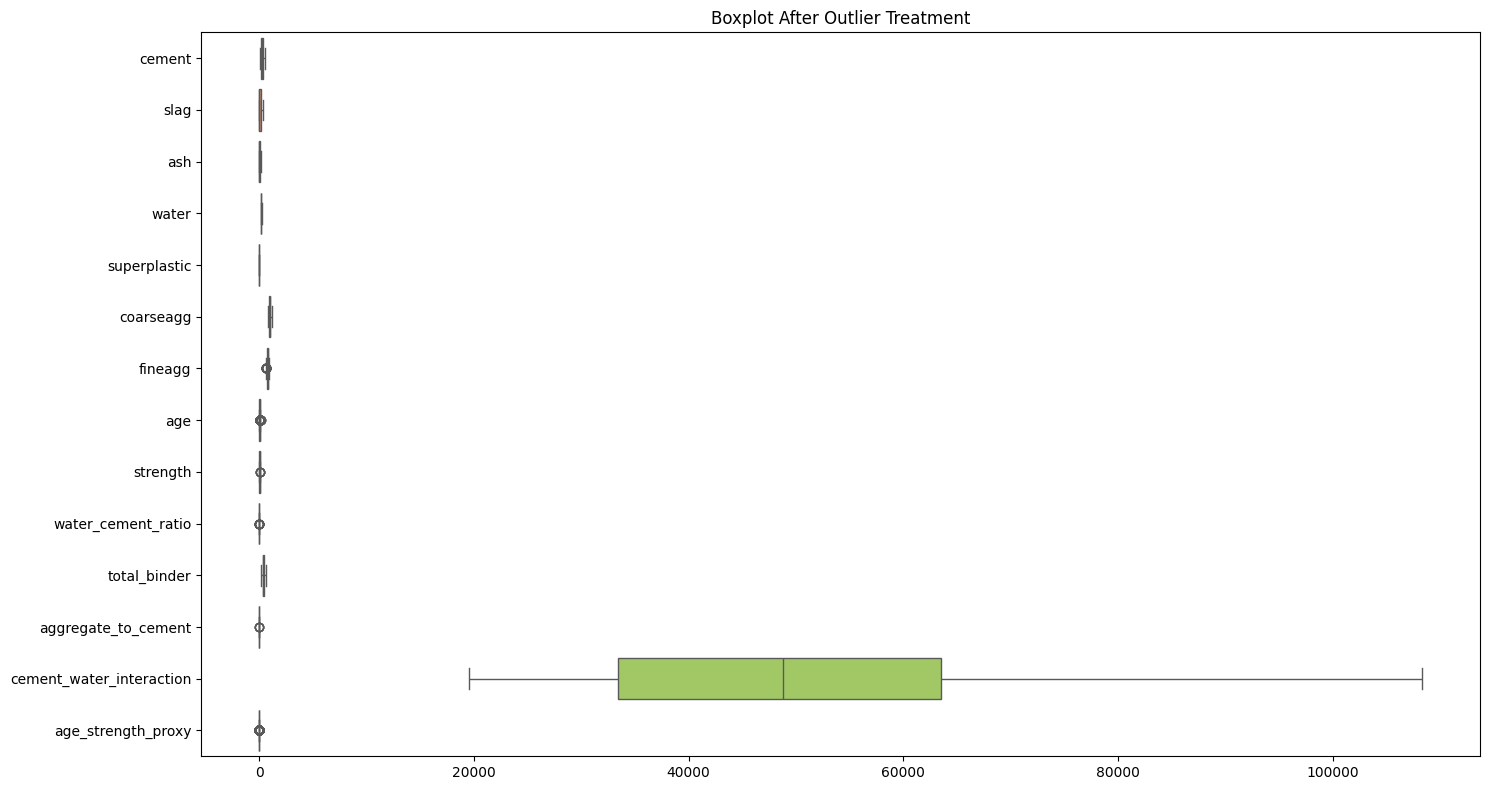

In [11]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplot for all numerical columns
sns.boxplot(data=df, orient='h', palette='Set2')

# Set title
plt.title('Boxplot After Outlier Treatment')
plt.tight_layout()
plt.show()

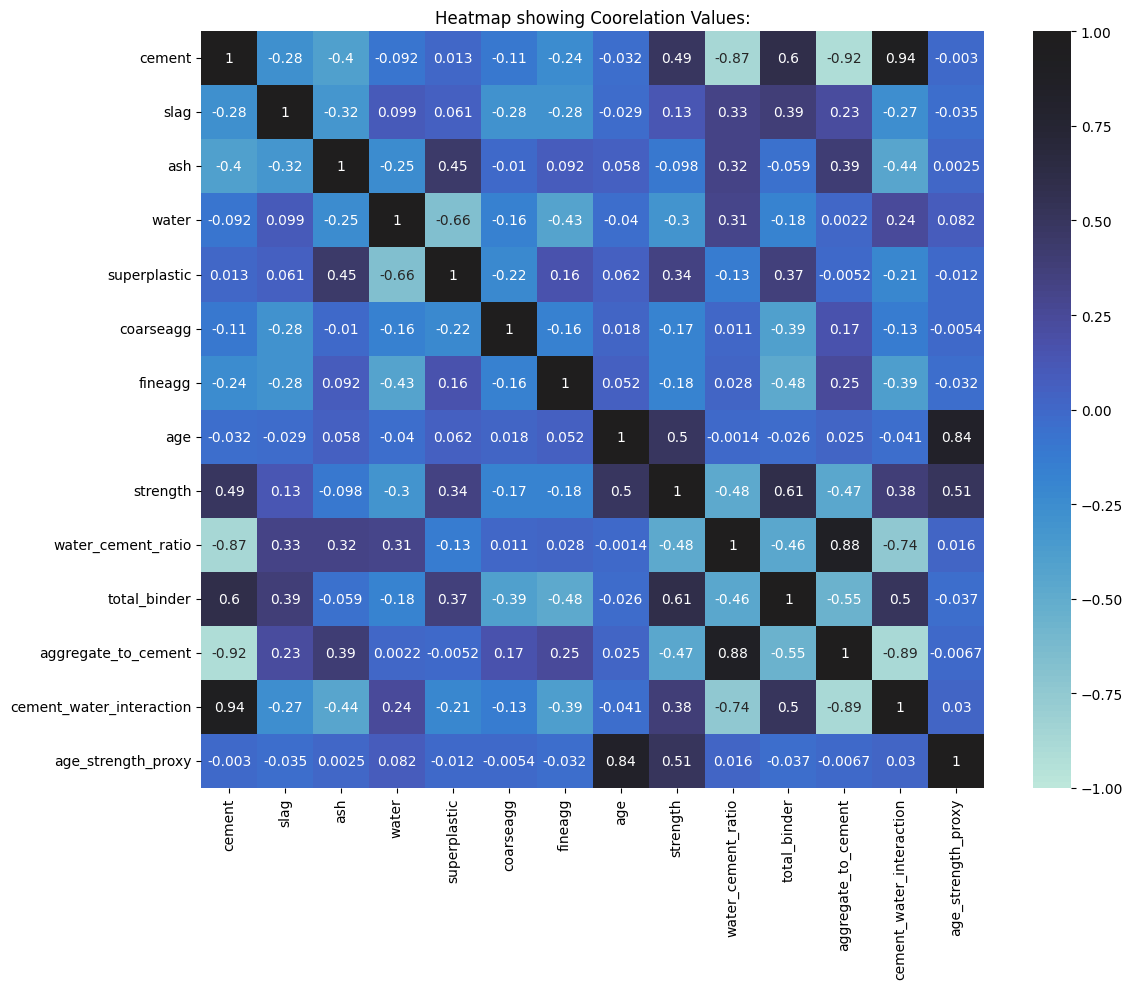

In [12]:
# Checking Correlation 
corr = df.corr()
df.ax = plt.subplots(figsize = (12,10))
sns.heatmap(corr,annot = True,center = True,vmax= 1,vmin = -1)
plt.title('Heatmap showing Coorelation Values:')
plt.tight_layout()
plt.show()

In [13]:
# Checking VIF:
%pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending=False)
    return (vif)

calculate_vif(df.drop('strength',axis = 1))

d:\Cement_Strength_model\.venv\Scripts\python.exe: No module named pip


Note: you may need to restart the kernel to use updated packages.


,features,VIF_Values
0,cement,1002.36
9,total_binder,816.36
11,cement_water_interaction,582.04
3,water,554.12
6,fineagg,178.52
5,coarseagg,159.97
10,aggregate_to_cement,93.81
8,water_cement_ratio,76.48
1,slag,59.87
2,ash,35.58


In [14]:
logging.info('VIF Values are calculated successfully')

In [15]:
# Using PCA Concept:

# Step 1: Standardize the data
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)

# Step 2: Determine number of components to retain 90% variance

for i in range(1, df.shape[1] + 1):
    pca = PCA(n_components=i)
    pca.fit(X_scaled)
    evr = np.cumsum(pca.explained_variance_ratio_)
    if evr[i - 1] >= 0.90:
        pcs = i
        break

print("Explained Variance Ratio:", evr)
print("Number of components selected:", pcs)

# Step 3: Apply PCA

pca = PCA(n_components=pcs)
pca_data = pca.fit_transform(X_scaled)

# Step 4: Create DataFrame

pca_columns = [f'PC{j+1}' for j in range(pcs)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Step 5: Join Target Column with PCA:

pca_df = pca_df.join(df['strength'], how = 'left')

pca_df

Explained Variance Ratio: [0.32494495 0.50861253 0.6516817  0.78240691 0.8730779  0.94198227]
Number of components selected: 6


,PC1,PC2,PC3,PC4,PC5,PC6,strength
0,-0.610140,-0.611041,0.490655,-0.099627,0.032911,0.035437,29.89
1,-0.679777,0.207268,-0.275598,-0.081617,0.018455,0.314788,23.51
2,-0.221249,0.095856,-0.249692,0.128314,0.030933,-0.218305,29.22
3,0.186997,-0.501029,0.263421,0.026074,-0.265461,-0.143547,45.85
4,-0.542456,-0.425188,0.329088,-0.131197,0.028401,0.311611,18.29
...,...,...,...,...,...,...,...
1025,-1.017615,0.219162,-0.156243,0.007815,-0.188032,-0.137666,13.29
1026,0.811145,0.180492,-0.466377,-0.312489,0.456963,-0.259008,41.30
1027,0.078858,0.247347,0.133742,-0.261116,-0.053179,-0.194867,44.28
1028,0.492295,-0.398053,0.082738,0.151407,-0.314734,-0.194082,55.06


In [16]:
logging.info('Principle component analysis is applied successfully')

In [17]:
logging.info('Building Models')

In [20]:
# 1. Prepare Features (X) and Target (y)
X = pca_df.drop('strength', axis=1)
y = pca_df['strength']

# 2. Split the data (train_and_test_split logic)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# 3. Initialize and Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

# 5. Calculate Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 6. Store result (matching the list format in your function)
result = ['LinearRegression', rmse, r2]

# Output the result
print(result)

['LinearRegression', np.float64(6.159947354855583), 0.8627326473259003]


In [25]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    'BaggingRegressor': BaggingRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'XGBRegressor': XGBRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor()
} 
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    result = [name, rmse, r2]
    print(result)
    print('-----------------------------')

['LinearRegression', np.float64(6.159947354855583), 0.8627326473259003]
-----------------------------
['RandomForestRegressor', np.float64(5.331017498020341), 0.8971904465187015]
-----------------------------
['AdaBoostRegressor', np.float64(7.8956242895172615), 0.7744794065365356]
-----------------------------
['GradientBoostingRegressor', np.float64(5.501420153746382), 0.890512917040226]
-----------------------------
['ExtraTreesRegressor', np.float64(4.911443368462069), 0.9127367188971834]
-----------------------------
['BaggingRegressor', np.float64(5.306229960223803), 0.8981442873487162]
-----------------------------
['DecisionTreeRegressor', np.float64(7.103191189944569), 0.8174758790308096]
-----------------------------
['SVR', np.float64(6.604975831444543), 0.8421822953675477]
-----------------------------
['KNeighborsRegressor', np.float64(6.405993978134576), 0.8515479124527241]
-----------------------------
['Ridge', np.float64(6.175936689062727), 0.8620191145690412]
--------

In [28]:
logging.info('K fold for cross validation')

In [26]:
from sklearn.model_selection import KFold, cross_val_score

# 1. Define the K-Fold strategy
kf = KFold(n_splits=5, shuffle=True, random_state=3)

print(f"{'Model Name':<30} | {'Mean RMSE':<12} | {'Mean R2':<10}")
print("-" * 60)

for name, model in models.items():
    # Calculate R2 using K-Fold
    # We use X and y (the full dataset) because K-Fold handles the splitting automatically
    cv_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2')
    
    # Calculate RMSE using K-Fold 
    # (Sklearn uses 'negative' MSE, so we take the absolute and then the square root)
    cv_mse = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(np.abs(cv_mse))
    
    # Average the results from the 5 folds
    mean_r2 = np.mean(cv_r2)
    mean_rmse = np.mean(cv_rmse)
    
    # Print clean results
    print(f"{name:<30} | {mean_rmse:<12.4f} | {mean_r2:<10.4f}")

Model Name                     | Mean RMSE    | Mean R2   
------------------------------------------------------------
LinearRegression               | 6.3205       | 0.8515    
RandomForestRegressor          | 4.9572       | 0.9102    
AdaBoostRegressor              | 7.4290       | 0.7935    
GradientBoostingRegressor      | 5.2168       | 0.8993    
ExtraTreesRegressor            | 4.4751       | 0.9257    
BaggingRegressor               | 5.1996       | 0.9028    
DecisionTreeRegressor          | 6.9073       | 0.8196    
SVR                            | 6.3774       | 0.8493    
KNeighborsRegressor            | 5.9738       | 0.8679    
Ridge                          | 6.3213       | 0.8515    
Lasso                          | 8.2813       | 0.7461    
ElasticNet                     | 13.6203      | 0.3136    
XGBRegressor                   | 4.8567       | 0.9126    


Running K-Fold Cross Validation...


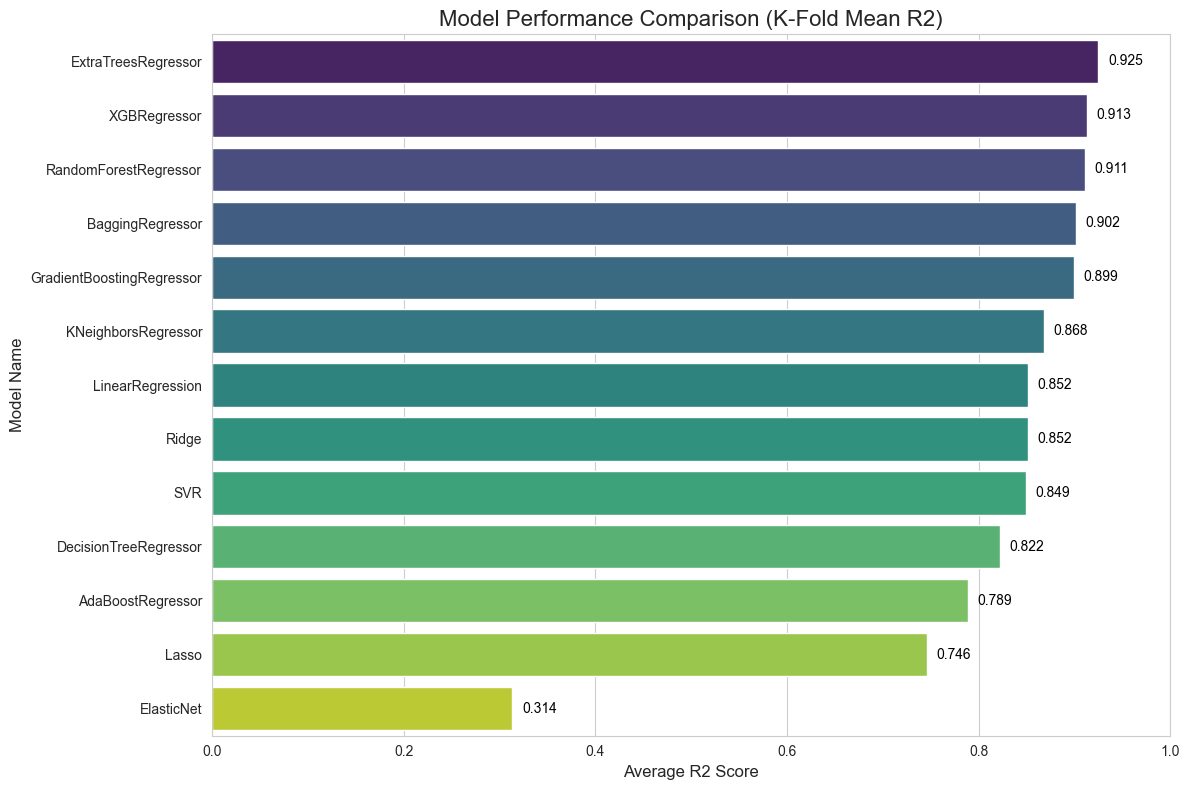

In [27]:
# 1. Setup K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=3)
results = []

print("Running K-Fold Cross Validation...")

# 2. Loop through each model in your dictionary
for name, model in models.items():
    # Calculate R2 scores for each fold
    cv_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2')
    
    # Store the results for plotting
    results.append({
        'Model': name,
        'Mean R2': np.mean(cv_r2),
        'Std Dev': np.std(cv_r2)
    })

# 3. Create a DataFrame for easy plotting
results_df = pd.DataFrame(results).sort_values(by='Mean R2', ascending=False)

# 4. Plotting the Comparison
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create barplot
bar_plot = sns.barplot(
    x='Mean R2', 
    y='Model', 
    data=results_df, 
    palette='viridis'
)

# Add titles and labels
plt.title('Model Performance Comparison (K-Fold Mean R2)', fontsize=16)
plt.xlabel('Average R2 Score', fontsize=12)
plt.ylabel('Model Name', fontsize=12)
plt.xlim(0, 1.0) # Scale R2 from 0 to 1

# Add the values as labels on the bars
for index, row in results_df.reset_index().iterrows():
    bar_plot.text(
        row['Mean R2'] + 0.01, # Position
        index, 
        f"{row['Mean R2']:.3f}", 
        va='center', 
        color='black', 
        fontsize=10
    )

plt.tight_layout()
plt.show()

In [32]:
def cv_post_hpt(X,y, fold = 5):
    score_LR = cross_val_score(LinearRegression(), X, y, cv = fold)
    score_LS = cross_val_score(Lasso(alpha = 0.1), X, y ,cv = fold)
    score_RD = cross_val_score(Ridge(alpha = 6 ), X , y , cv = fold)
    score_DTR = cross_val_score(DecisionTreeRegressor(max_depth = 16), X , y , cv = fold)
    score_SVR= cross_val_score(SVR(C = 1), X , y , cv = fold)
    score_RandomForest = cross_val_score(RandomForestRegressor(max_depth = 14, max_features = 4), X , y , cv = fold)
    score_KNN = cross_val_score(KNeighborsRegressor(n_neighbors = 4), X , y , cv = fold)
    score_GBoost = cross_val_score(GradientBoostingRegressor(alpha = 0.9), X , y , cv = fold)
    score_XGBoost = cross_val_score(XGBRegressor(eta = 0.2,max_depth = 5, reg_lambda = 0, gamma = 0), X , y , cv = fold)
    score_AdaBoost = cross_val_score(AdaBoostRegressor(learning_rate = 1), X , y , cv = fold)
    score_ExtraTreesRegressor = cross_val_score(ExtraTreesRegressor(max_depth = 14, max_features = 4), X , y , cv = fold)
    
    
    model_name = ['Linear Regression', 'Lasso', 'Ridge', 'DTR' , 'SVR' , 'Random Forest' , 'KNN', 'Gboost' , 'XGBoost' , 'AdaBoost','ExtraTreesRegressor']
    scores = [score_LR, score_LS, score_RD, score_DTR, score_SVR,score_RandomForest, score_KNN, score_GBoost, score_XGBoost, score_AdaBoost, score_ExtraTreesRegressor]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name , score_mean , score_std]
        result.append(temp)
    k_fold_df = pd.DataFrame(result , columns = ['Model Name' , 'CV Accuracy' , 'CV STD'])
    return k_fold_df.sort_values('CV Accuracy', ascending = False)


cv_post_hpt(pca_df.drop('strength',axis=1), pca_df['strength'])


,Model Name,CV Accuracy,CV STD
8,XGBoost,0.921665,0.017241
10,ExtraTreesRegressor,0.920054,0.019891
5,Random Forest,0.909205,0.025001
7,Gboost,0.899029,0.017901
6,KNN,0.862885,0.028869
0,Linear Regression,0.849030,0.021829
2,Ridge,0.847150,0.020644
1,Lasso,0.846655,0.021569
4,SVR,0.844674,0.014028
3,DTR,0.830962,0.033536


In [33]:
logging.info('Found the Best Regressor model i.e XGBRegressor')

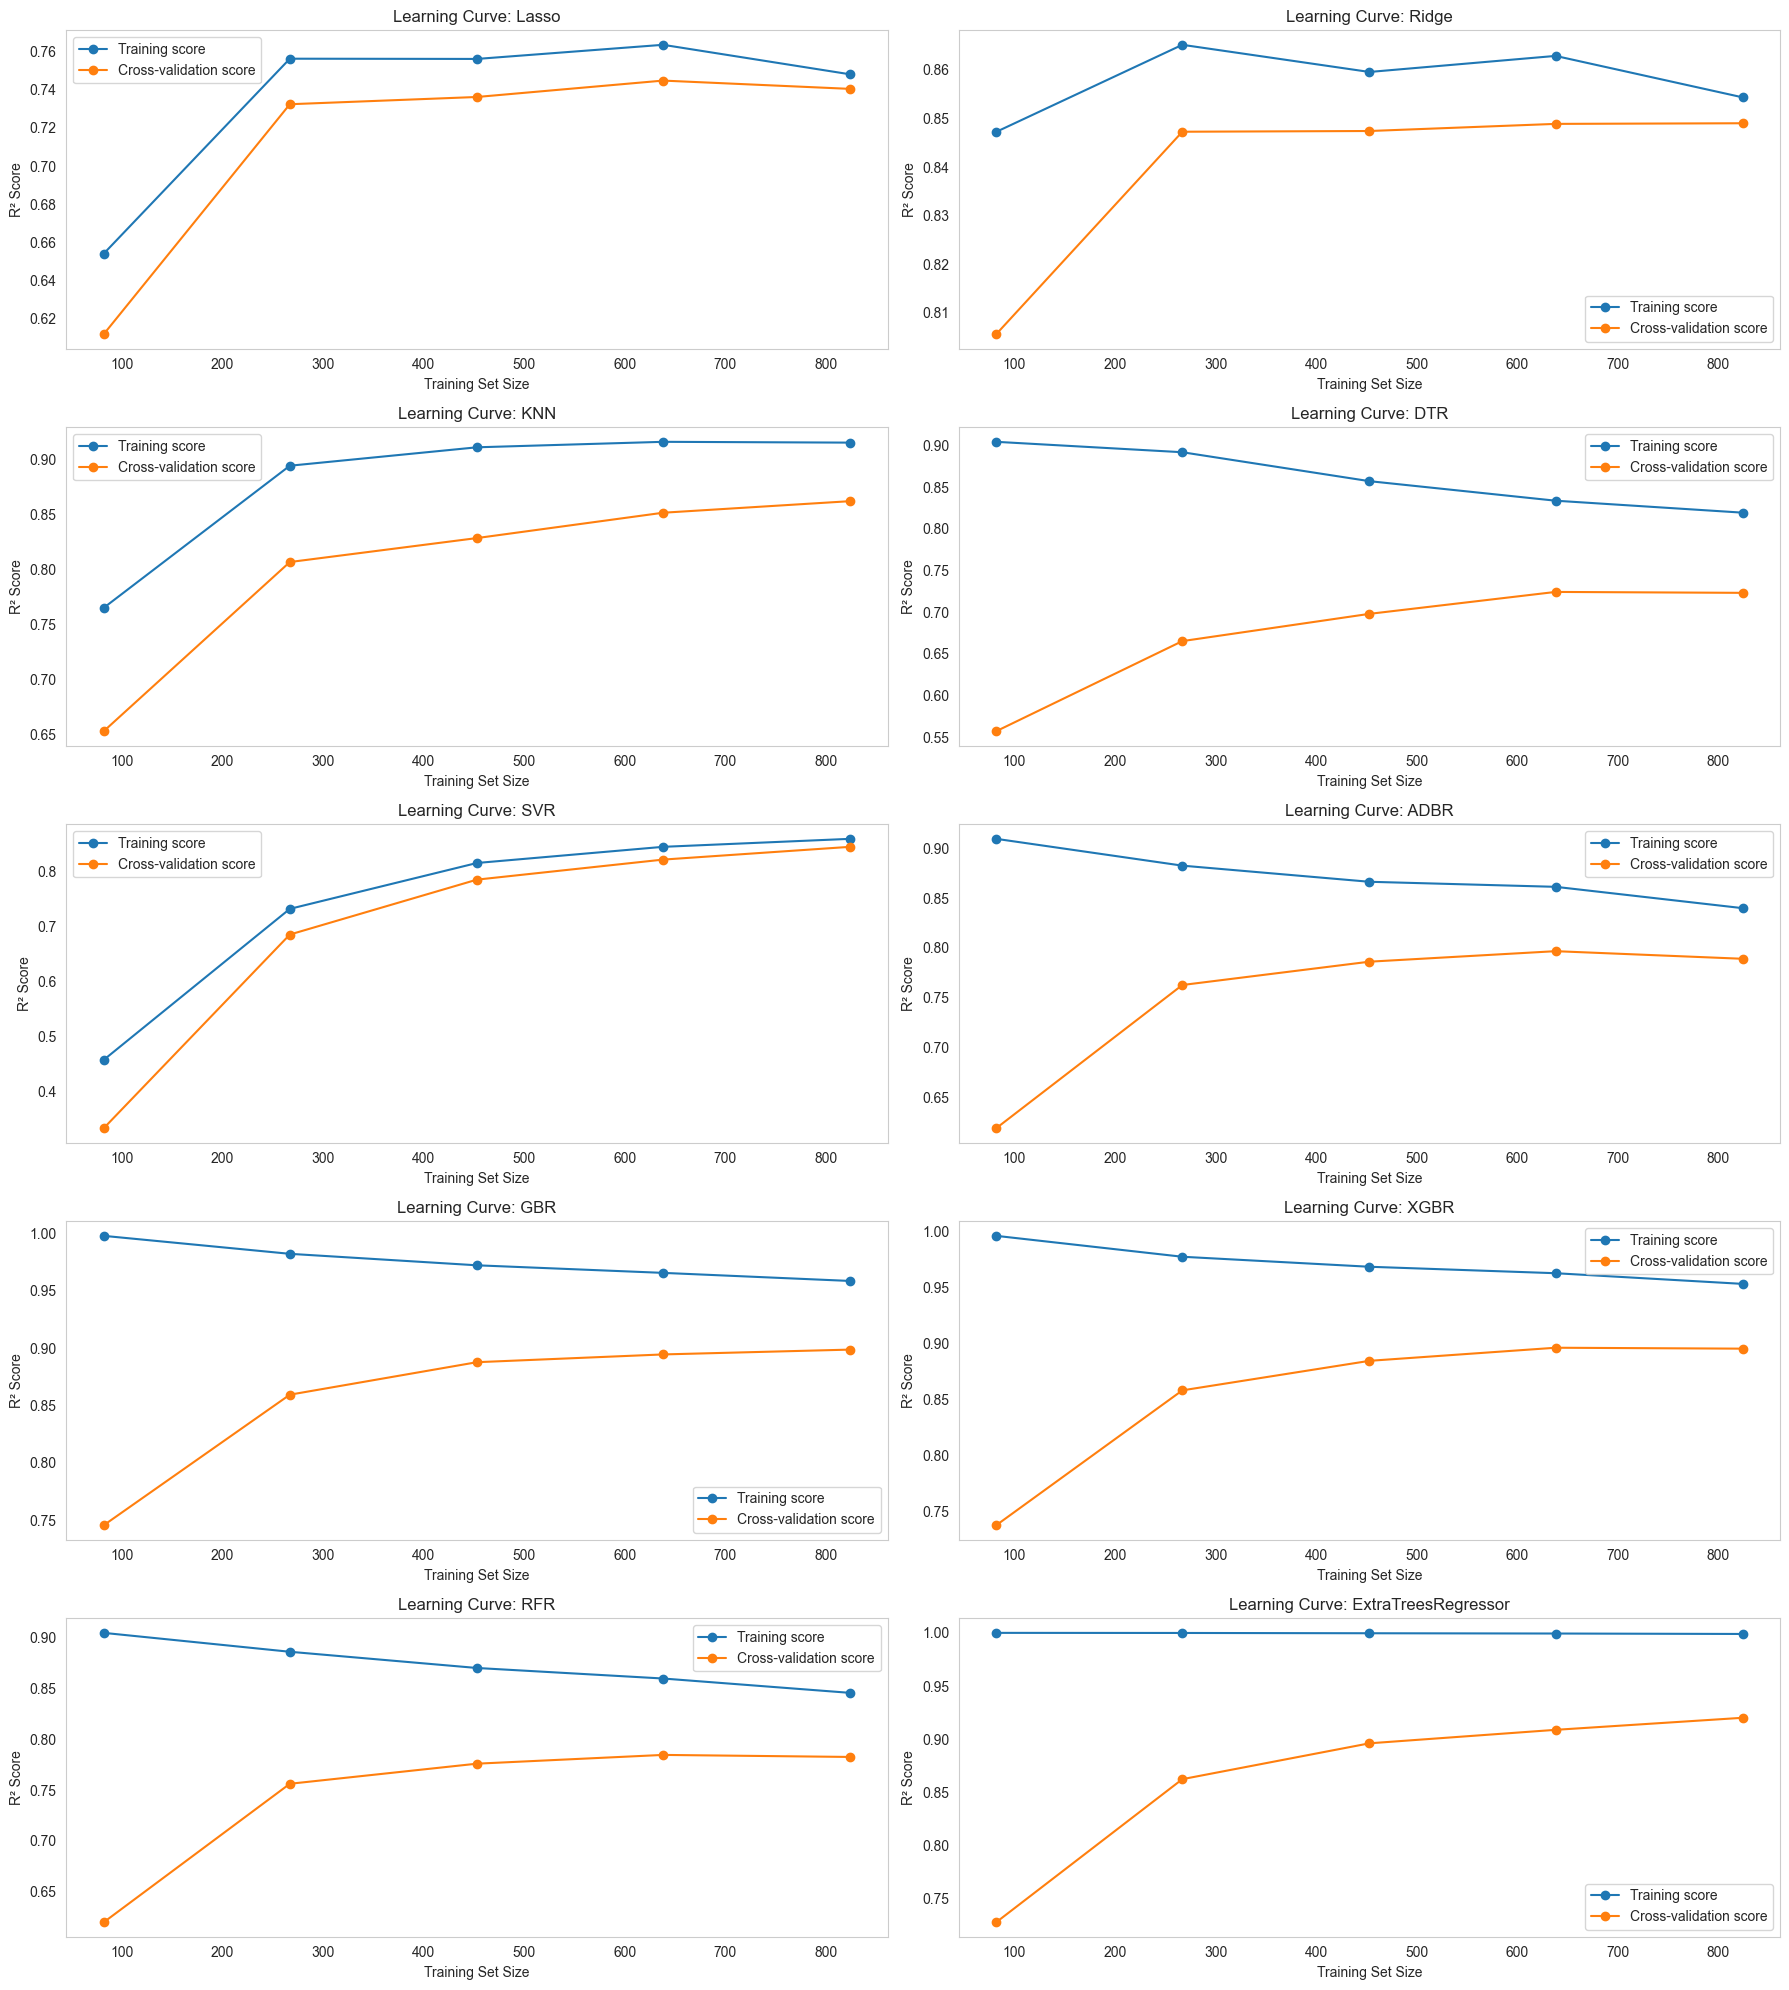

In [34]:
# Plotting Learning Rate
# List of models
from sklearn.model_selection import learning_curve


models = {
    'Lasso': Lasso(alpha=1),
    'Ridge': Ridge(alpha=1),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'DTR': DecisionTreeRegressor(max_depth=5),
    'SVR': SVR(C=1, gamma='scale'),
    'ADBR': AdaBoostRegressor(learning_rate=1),
    'GBR': GradientBoostingRegressor(alpha=0.1),
    'XGBR': XGBRegressor(eta=0.1, max_depth=3, verbosity=0),
    'RFR': RandomForestRegressor(max_depth=5, max_features='sqrt'),
    'ExtraTreesRegressor': ExtraTreesRegressor(max_depth=14, max_features=4)
}

X = pca_df.drop('strength', axis=1)
y = pca_df['strength']

# Plot learning curves
plt.figure(figsize=(18, 20))
for i, (name, model) in enumerate(models.items()):
    plt.subplot(5, 2, i+1)

    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5),
        scoring='r2'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
    plt.title(f'Learning Curve: {name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('R² Score')
    plt.legend(loc='best')
    plt.grid()

plt.tight_layout()
plt.show()

In [36]:
import pickle
pickle.dump(model, open(f'{name}_model.pkl', 'wb'))